<a href="https://colab.research.google.com/github/farzanajui/Farzana_Akter_23337406/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [1]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai
!pip install pyinputplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.5/155.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.0/352.0 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: jiter
    Found existing 

In [2]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: 0749442c62d8427dacd7bf2fc3245ed7.L34nnJS2MhpTBymjN6ubsKE9


## 📦 Setup and Configuration
Import required packages and setup environment.

In [3]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [4]:
import requests

def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location using wttr.in.

    Args:
        location (str): City or location name (e.g. "London", "Paris", "Perth")
        forecast_days (int): Number of days to forecast (1–5)

    Returns:
        dict: Weather data including current conditions and forecast, or None if error.
    """

    def _validate_days(days):
        """Ensure forecast_days stays within 1–5 range."""
        return max(1, min(days, 5))

    def _fetch_data(url):
        """Fetch and return JSON data from wttr.in, handling errors."""
        try:
            resp = requests.get(url, timeout=10)
            resp.raise_for_status()
            return resp.json()
        except requests.RequestException as err:
            print(f"Error fetching weather data: {err}")
            return None

    def _extract_current(current_data):
        """Extract and simplify current condition info."""
        if not current_data:
            return {}
        data = current_data[0]
        return {
            "temp_C": data.get("temp_C"),
            "weatherDesc": data.get("weatherDesc", [{}])[0].get("value"),
            "humidity": data.get("humidity"),
            "FeelsLikeC": data.get("FeelsLikeC"),
            "windspeedKmph": data.get("windspeedKmph"),
            "precipMM": data.get("precipMM"),
        }

    def _extract_forecast(weather_data, days):
        """Extract and format forecast for specified number of days."""
        forecast_list = []
        for entry in weather_data[:days]:
            astronomy = entry.get("astronomy", [{}])[0]
            forecast_list.append({
                "date": entry.get("date"),
                "maxtempC": entry.get("maxtempC"),
                "mintempC": entry.get("mintempC"),
                "avgtempC": entry.get("avgtempC"),
                "sunrise": astronomy.get("sunrise"),
                "sunset": astronomy.get("sunset"),
                "hourly": entry.get("hourly", [])
            })
        return forecast_list

    # --- Main execution ---
    forecast_days = _validate_days(forecast_days)
    api_url = f"https://wttr.in/{location}?format=j1"

    raw_data = _fetch_data(api_url)
    if not raw_data:
        return None

    current = _extract_current(raw_data.get("current_condition", []))
    forecast = _extract_forecast(raw_data.get("weather", []), forecast_days)

    return {
        "location": location,
        "current": current,
        "forecast": forecast
    }

## 📊 Visualisation Functions

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def create_temperature_visualisation(weather_data, date_range=None, output_type='display'):
    """
    Create a bar chart visualisation of temperature data across a date range.

    Args:
        weather_data (dict): The processed weather data from get_weather_data()
        date_range (tuple/list): Optional start and end date ("YYYY-MM-DD", "YYYY-MM-DD")
        output_type (str): 'display' to show in notebook or 'figure' to return the matplotlib figure

    Returns:
        matplotlib.figure.Figure if output_type == 'figure', else None
    """
    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]
    df = pd.DataFrame(forecast)

    # Ensure numeric temperature values
    for col in ["maxtempC", "mintempC", "avgtempC"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")

    # Convert and filter by date range if provided
    df["date"] = pd.to_datetime(df["date"])
    if date_range:
        start_date, end_date = pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1])
        df = df[(df["date"] >= start_date) & (df["date"] <= end_date)]

    if df.empty:
        print("No data found for the given date range.")
        return None

    # Create bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    bar_width = 0.25
    x = range(len(df))

    ax.bar([i - bar_width for i in x], df["maxtempC"], width=bar_width, label="Max Temp (°C)", color="red")
    ax.bar(x, df["avgtempC"], width=bar_width, label="Avg Temp (°C)", color="green")
    ax.bar([i + bar_width for i in x], df["mintempC"], width=bar_width, label="Min Temp (°C)", color="blue")

    ax.set_title(f"Temperature Forecast for {weather_data['location']}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Temperature (°C)")
    ax.set_xticks(x)
    ax.set_xticklabels(df["date"].dt.strftime("%Y-%m-%d"), rotation=45)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.tight_layout()

    # Return or display
    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create a combined bar + scatter visualisation of precipitation data across forecast days.

    Args:
        weather_data (dict): The processed weather data from get_weather_data()
        output_type (str): 'display' to show in notebook or 'figure' to return the matplotlib figure

    Returns:
        matplotlib.figure.Figure if output_type == 'figure', else None
    """
    if not weather_data or "forecast" not in weather_data:
        print("No forecast data available.")
        return None

    forecast = weather_data["forecast"]

    # Build a daily summary DataFrame
    rows = []
    for day in forecast:
        date = day.get("date")
        hourly = day.get("hourly", [])
        df_hourly = pd.DataFrame(hourly)

        if not df_hourly.empty:
            df_hourly["precipMM"] = pd.to_numeric(df_hourly.get("precipMM"), errors="coerce")
            df_hourly["chanceofrain"] = pd.to_numeric(df_hourly.get("chanceofrain"), errors="coerce")

            daily_precip = df_hourly["precipMM"].sum()
            avg_chance = df_hourly["chanceofrain"].mean()
        else:
            daily_precip, avg_chance = 0, 0

        rows.append({"date": date, "precipMM": daily_precip, "chanceofrain": avg_chance})

    df = pd.DataFrame(rows)

    if df.empty:
        print("No precipitation data available.")
        return None

    # Create figure with bar + scatter
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar chart for precipitation (mm)
    bars = ax1.bar(df["date"], df["precipMM"], color="skyblue", alpha=0.7, label="Total Precipitation (mm)")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Precipitation (mm)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Scatter plot for chance of rain (%) on secondary axis
    ax2 = ax1.twinx()
    ax2.scatter(df["date"], df["chanceofrain"], color="darkgreen", s=80, label="Chance of Rain (%)", zorder=5)
    ax2.set_ylabel("Chance of Rain (%)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    # Titles, grid, and formatting
    plt.title(f"Precipitation Forecast for {weather_data['location']}")
    fig.autofmt_xdate()
    ax1.grid(True, linestyle="--", alpha=0.6)

    # Legends
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")

    plt.tight_layout()

    # Return or display
    if output_type == 'figure':
        return fig
    else:
        plt.show()
        return None


## 🤖 Natural Language Processing

In [20]:
import re
import datetime

def parse_weather_question(question):
    """
    Parse a user's natural language weather question into structured components.

    Args:
        question (str): User question (e.g. "What will the temperature be in Paris tomorrow?")

    Returns:
        dict: {"location": str, "days_ahead": int, "attribute": str}
    """
    q = question.lower().strip()

    # --- Detect weather attribute ---
    if re.search(r"\brain\b|\bprecipitation\b|\brainfall\b", q):
        attribute = "precipitation"
    elif re.search(r"\btemperature\b|\bhot\b|\bcold\b|\bdegrees?\b", q):
        attribute = "temperature"
    elif re.search(r"\bwind\b|\bwindy\b", q):
        attribute = "wind"
    elif re.search(r"\bhumidity\b|\bhumid\b", q):
        attribute = "humidity"
    else:
        attribute = "general"

    # --- Detect days ahead ---
    if "today" in q:
        days_ahead = 0
    elif "tomorrow" in q:
        days_ahead = 1
    elif "day after tomorrow" in q:
        days_ahead = 2
    else:
        days_ahead = 0  # default fallback

    cleaned = re.sub(
        r"(what|will|the|weather|be|like|is|it|forecast|for|today|tomorrow|day after tomorrow|temperature|rain|precipitation|in|at|of|please|\?)",
        "",
        q
    )

    # Extract alphabetic sequences (words) and capitalize properly
    location_match = re.findall(r"[a-zA-Z]+(?:\s+[a-zA-Z]+)*", cleaned)
    location = location_match[-1].strip().title() if location_match else "Unknown"

    return {
        "location": location,
        "days_ahead": days_ahead,
        "attribute": attribute
    }


## 🧭 User Interface

🌤️ Weather Assistant
Ask me about the weather (e.g., 'what will be the temperature of bangladesh tomorrow?/'):
> will there rain in london tomorrow
{'location': 'Re   London', 'days_ahead': 1, 'attribute': 'precipitation'}

👉 The total expected rainfall tomorrow in Re   London is 1.9 mm.


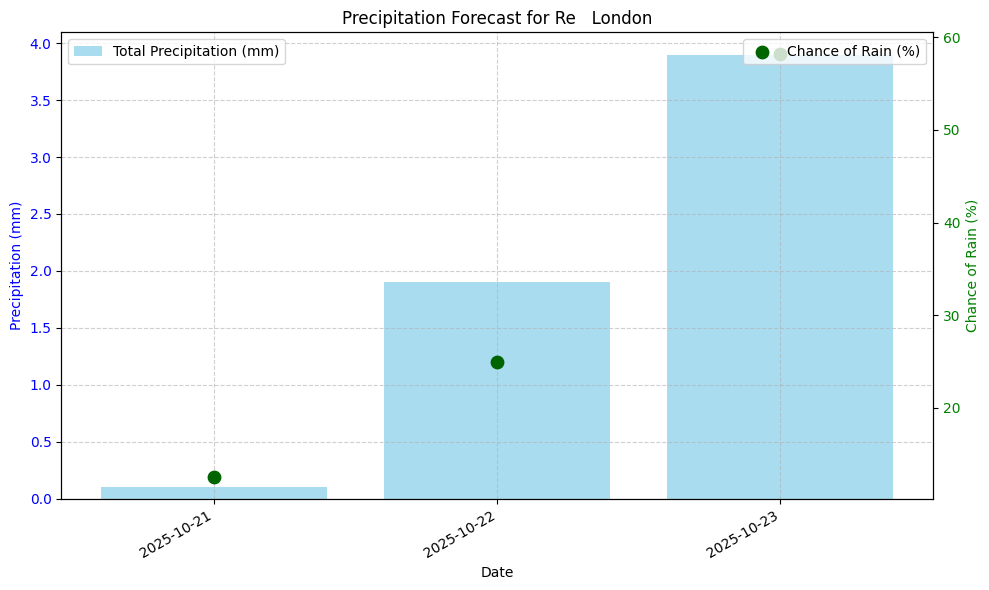

In [33]:
# Define menu functions using pyinputplus or ipywidgets here
# Include sample input/output for each function
def main():
    print("🌤️ Weather Assistant")
    question = input("Ask me about the weather (e.g., 'what will be the temperature of bangladesh tomorrow?/will there rain in london tomorrow?'):\n> ")

    parsed = parse_weather_question(question)
    weather_data = get_weather_data(parsed["location"], forecast_days=3)  # max 3 with wttr.in
    if not weather_data:
        print("Could not fetch weather data.")
        return

    response_text, fig = generate_weather_response(parsed, weather_data)
    print("\n👉 " + response_text)

    if fig:
      fig.show()



# Example run
if __name__ == "__main__":
    main()


## 🧩 Main Application Logic

In [17]:
def generate_weather_response(parsed_question, weather_data):

    location = parsed_question.get("location", "the specified location")
    attribute = parsed_question.get("attribute", "").lower()
    days_ahead = parsed_question.get("days_ahead", 0)

    forecast = weather_data.get("forecast", [])
    if not forecast:
        return ("Sorry, I couldn’t find any forecast data.", None)

    if days_ahead >= len(forecast):
        return (f"Sorry, I only have forecast data for {len(forecast)} days ahead.", None)

    # Identify target day for message clarity
    if days_ahead == 0:
        target_day = "today"
    elif days_ahead == 1:
        target_day = "tomorrow"
    else:
        target_day = f"in {days_ahead} days"

    day_data = forecast[days_ahead]
    figure = None  # default (no visualization)

    # --- Attribute-specific responses ---
    if attribute == "temperature":
        figure = create_temperature_visualisation(weather_data, output_type="figure")
        response = (
            f"The forecasted temperature {target_day} in {location} is "
            f"{day_data.get('mintempC')}°C to {day_data.get('maxtempC')}°C "
            f"(average {day_data.get('avgtempC')}°C)."
        )

    elif attribute == "precipitation":
        figure = create_precipitation_visualisation(weather_data, output_type="figure")
        total_precip = sum(float(h.get("precipMM", 0)) for h in day_data.get("hourly", []))
        response = (
            f"The total expected rainfall {target_day} in {location} "
            f"is {total_precip:.1f} mm."
        )



    else:
        response = (
            f"Sorry, I couldn’t understand the weather attribute in your question. "
            f"Try asking about temperature, precipitation."
        )

    return response, figure


## 🧪 Testing and Examples

In [ ]:
# Include sample input/output for each function

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.